In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from matplotlib import cm
import matplotlib.image as mpimg
import scipy.optimize
import numpy as np
%matplotlib inline

colors = plt.get_cmap('Vega10')

In [2]:
def convert_dispersion(dispersion):
    """Converts a dispersion from eV/px to the DM format and inversely.
    The calculation is the same for both directions."""
    return 15 / dispersion

dispersions_dm = {
    '315': 770.8,
    '250': 610,
    '200': 496.4,
    '163': 394.6,
    '125': 307.7,
    '100': 227.0,
    '80': 193.64,
    '63': 164.22,
    '50': 134.36,
    '40': 109.58,
    '19.5': 89.1,
    '0.25': 65.6
}

dispersions = {}
for key, value in dispersions_dm.items():
    dispersions[key] = convert_dispersion(value)

print(dispersions['100'] / dispersions['315'])

3.3955947136563873


In [3]:
def read_data(directory):
    import os
    import re

    data = {}
    pattern_SM = r'SM\d+'
    pattern_Pos = r'Pos\d'
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            result_SM = re.search(pattern_SM, file)
            if result_SM:
                result_Pos = re.search(pattern_Pos, file)
                date = pd.read_csv(os.path.join(directory, file), delimiter=';')
                if result_Pos:
                    if not result_SM.group(0)in data.keys():
                        data[result_SM.group(0)] = {}
                    data[result_SM.group(0)][result_Pos.group(0)] = date
                else:
                    data[result_SM.group(0)] = date
    return data

In [4]:
dirs = ('data/100µm-Blende/', 'data/650µm-Blende/', 'data/Spalt-Blende/')
data_100µm, data_650µm, data_spalt = (read_data(directory) for directory in dirs)
data_100μm['SM163']['Pos2'].head()

,y-position,y-error,x-position,x-error,left-position,left-error,right-position,right-error,width,width-error,threshold,fitted-x-position,fitted-left-position,fitted-right-position
0,319.142273,0.0,2285.315674,0.0,2228.0,0.0,2342.0,0.0,114.0,0.0,0.0,2285.344686,2228.123787,2342.984561
1,447.030914,0.0,2284.556885,0.0,2228.0,0.0,2342.0,0.0,114.0,0.0,0.0,2284.524181,2228.011816,2341.426508
2,574.933655,0.0,2283.619629,0.0,2228.0,0.0,2340.0,0.0,112.0,0.0,0.0,2283.597104,2227.832397,2339.729317
3,702.974670,0.0,2282.606201,0.0,2228.0,0.0,2338.0,0.0,110.0,0.0,0.0,2282.576101,2227.594911,2337.907584
4,831.016357,0.0,2281.550537,0.0,2228.0,0.0,2336.0,0.0,108.0,0.0,0.0,2281.475866,2227.309200,2335.979574


In [5]:
def plot_spec(data, pos=None):
    x_values = []
    y_values = []
    left_values = []
    right_values = []
    labels = []
    if pos:
        for key, date in data.items():
            x_values.append(date[pos]['x-position'])
            y_values.append(date[pos]['y-position'])
            left_values.append(date[pos]['left-position'])
            right_values.append(date[pos]['right-position'])
            labels.append(key)
    else:
        for key, date in data.items():
            x_values.append(date['x-position'])
            y_values.append(date['y-position'])
            left_values.append(date['left-position'])
            right_values.append(date['right-position'])
            labels.append(key)

    fig = plt.Figure(figsize=(5,5))
    ax = plt.subplot(111)
    ax.set_xlim(-2048, 2048 + 1500)
    ax.set_xticks(range(-2048, 2049, 512))
    ax.set_yticks(range(2048, -2049, -256))
    
    plt.xlabel('energiedispersive Achse [px]')
    plt.ylabel('Ortsachse [px]')

    index = range(len(data))
    hatches = ('/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*')
    dataset = sorted(zip(y_values, x_values, left_values, right_values, labels, index), key=lambda x: x[4])
        
    for xs, ys, top, bot, label, i in dataset:
        color = colors(i)
        xs = xs - 2048
        top = top - 2048
        bot = bot -2048
        ys = ys - 2048
        # Ein label reicht aus, da 3 Graphen zu einem SpecMag gehören.
        ax.scatter(xs, top, label=label, marker='x', color=color)
        ax.scatter(xs, bot, label='', marker='x', color=color)
        ax.plot(xs, ys, c=color, label='')
    ax.legend(loc='center right')
    return fig

In [6]:
def plot_spec_scaled(data, pos=None):
    x_values = []
    y_values = []
    left_values = []
    right_values = []
    labels = []
    if pos:
        for key, date in data.items():
            x_values.append(date[pos]['x-position'])
            y_values.append(date[pos]['y-position'])
            left_values.append(date[pos]['left-position'])
            right_values.append(date[pos]['right-position'])
            labels.append(key)
    else:
        for key, date in data.items():
            x_values.append(date['x-position'])
            y_values.append(date['y-position'])
            left_values.append(date['left-position'])
            right_values.append(date['right-position'])
            labels.append(key)

    fig = plt.Figure(figsize=(5,5))
    ax = plt.subplot(111)
    #ax.set_xlim(-2048, 2048 + 1500)
    ax.set_xticks(range(-4096, 4097, 1024))
    ax.set_yticks(range(1024, -1025, -512))
    
    plt.xlabel('energiedispersive Achse [px]')
    plt.ylabel('Ortsachse [px]')

    index = range(len(data))
    hatches = ('/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*')
    dataset = sorted(zip(y_values, x_values, left_values, right_values, labels, index), key=lambda x: x[4])
    
    for xs, ys, top, bot, label, i in dataset:
        sm = label.replace('SM', '')
        xs = (xs - 2048) * dispersions[sm] / dispersions['315']
        top = (top - ys) * dispersions[sm] / dispersions['315']
        bot = (bot - ys) * dispersions[sm] / dispersions['315']
        color = colors(i)
        # Ein label reicht aus, da 3 Graphen zu einem SpecMag gehören.
        ax.scatter(xs, bot, label=label, marker='x', color=color)
        ax.scatter(xs, top, label='', marker='x', color=color)
        #ax.plot(xs, ys, c=color, label=label, alpha=0.4)
    ax.legend(loc='center left')
    return fig

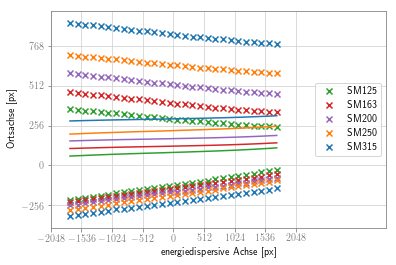

In [7]:
data_650μm_copy = data_650μm.copy()
if 'SM100' in data_650μm_copy:
    del data_650μm_copy['SM100']
plot_spec(data_650μm_copy)
plt.savefig('Bilder/SR-EELS_Charakterisierung_Vergleich_SM')
plt.show()

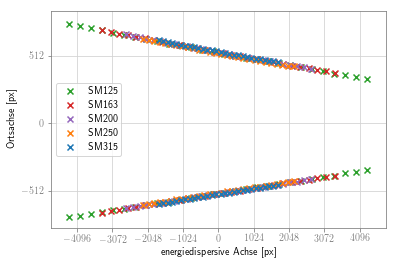

In [8]:
plot_spec_scaled(data_650μm_copy)
plt.savefig('Bilder/SR-EELS_Charakterisierung_Vergleich_SM_scaled')
plt.show()

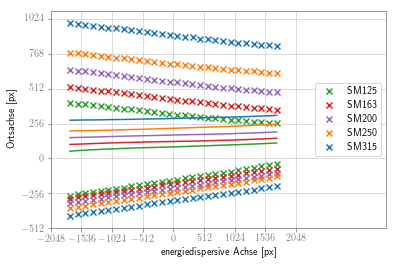

In [9]:
data_spalt_copy = data_spalt.copy()
if 'SM100' in data_spalt_copy:
    del data_spalt_copy['SM100']
plot_spec(data_spalt_copy)
plt.show()

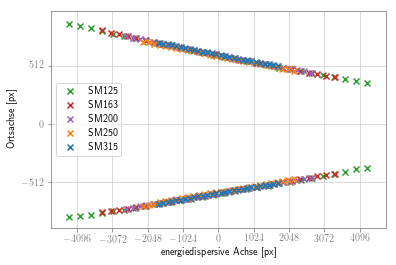

In [10]:
plot_spec_scaled(data_spalt_copy)
plt.show()

Pos1


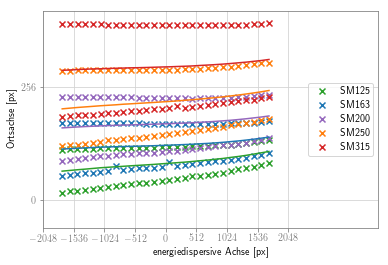

Pos2


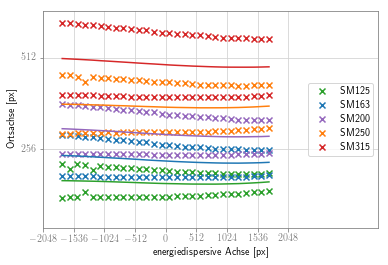

Pos3


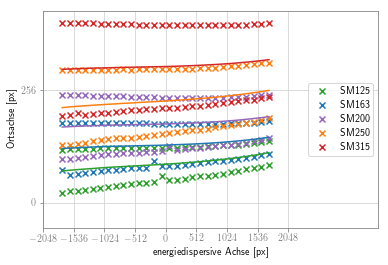

In [11]:
data_100μm_copy = data_100μm.copy()
if 'SM100' in data_100μm_copy:
    del data_100μm_copy['SM100']
print('Pos1')
plot_spec(data_100μm_copy, 'Pos1')
plt.show()
print('Pos2')
plot_spec(data_100μm_copy, 'Pos2')
plt.show()
print('Pos3')
plot_spec(data_100μm_copy, 'Pos3')
plt.show()

Pos1


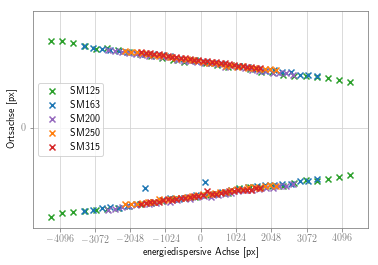

Pos2


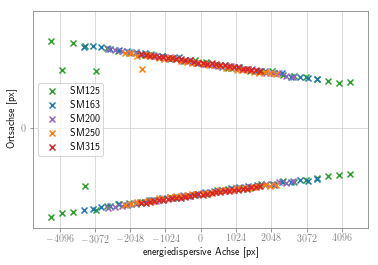

Pos3


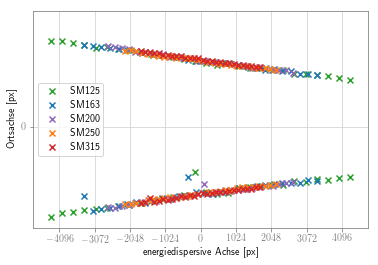

In [12]:
print('Pos1')
plot_spec_scaled(data_100μm_copy, 'Pos1')
plt.show()
print('Pos2')
plot_spec_scaled(data_100μm_copy, 'Pos2')
plt.show()
print('Pos3')
plot_spec_scaled(data_100μm_copy, 'Pos3')
plt.show()

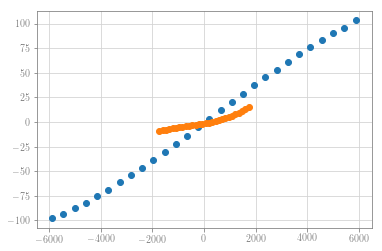

In [13]:
data_100_p1_x = data_100μm['SM100']['Pos1']['y-position']
data_100_p1_x = data_100_p1_x - 2048
data_100_p1_x = data_100_p1_x * dispersions['100'] / dispersions['315']
data_100_p1_y = data_100μm['SM100']['Pos1']['x-position']
data_100_p1_y = data_100_p1_y - data_100_p1_y.mean()
data_100_p1_y = data_100_p1_y * dispersions['100'] / dispersions['315']

data_315_p1_x = data_100μm['SM315']['Pos1']['y-position'] - 2048
data_315_p1_y = data_100μm['SM315']['Pos1']['x-position']
data_315_p1_y = data_315_p1_y - data_315_p1_y.mean()

plt.scatter(data_100_p1_x, data_100_p1_y)
plt.scatter(data_315_p1_x, data_315_p1_y)
plt.show()

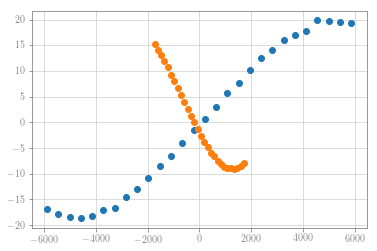

In [14]:
data_100_p2_x = data_100μm['SM100']['Pos2']['y-position']
data_100_p2_x = data_100_p2_x - 2048
data_100_p2_x = data_100_p2_x * dispersions['100'] / dispersions['315']
data_100_p2_y = data_100μm['SM100']['Pos2']['x-position']
data_100_p2_y = data_100_p2_y - data_100_p2_y.mean()
data_100_p2_y = data_100_p2_y * dispersions['100'] / dispersions['315']

data_315_p2_x = data_100μm['SM315']['Pos2']['y-position'] - 2048
data_315_p2_y = data_100μm['SM315']['Pos2']['x-position']
data_315_p2_y = data_315_p2_y - data_315_p2_y.mean()

plt.scatter(data_100_p2_x, data_100_p2_y)
plt.scatter(data_315_p2_x, data_315_p2_y)
plt.show()

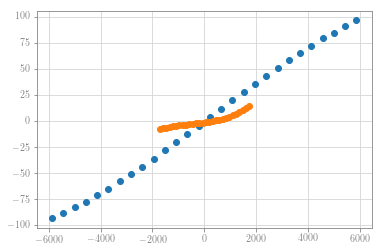

In [15]:
data_100_p3_x = data_100μm['SM100']['Pos3']['y-position']
data_100_p3_x = data_100_p3_x - 2048
data_100_p3_x = data_100_p3_x * dispersions['100'] / dispersions['315']
data_100_p3_y = data_100μm['SM100']['Pos3']['x-position']
data_100_p3_y = data_100_p3_y - data_100_p3_y.mean()
data_100_p3_y = data_100_p3_y * dispersions['100'] / dispersions['315']

data_315_p3_x = data_100μm['SM315']['Pos3']['y-position'] - 2048
data_315_p3_y = data_100μm['SM315']['Pos3']['x-position']
data_315_p3_y = data_315_p3_y - data_315_p3_y.mean()

plt.scatter(data_100_p3_x, data_100_p3_y)
plt.scatter(data_315_p3_x, data_315_p3_y)
plt.show()

Ohne Skalierung verlaufen beide Kurven parallel. Es schein einen Offset zu geben, über den sich die Breiten unterscheiden.

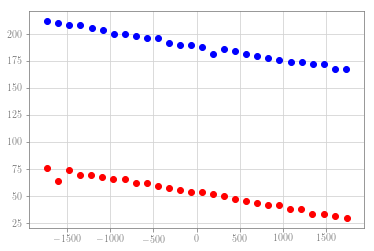

In [16]:
data_100_p1_x = data_100μm['SM100']['Pos1']['y-position'] -2048
data_100_p1_w = data_100μm['SM100']['Pos1']['width']

data_315_p1_x = data_100μm['SM315']['Pos1']['y-position'] - 2048
data_315_p1_w = data_100μm['SM315']['Pos1']['width']

plt.scatter(data_100_p1_x, data_100_p1_w, c='r', edgecolor='r')
plt.scatter(data_315_p1_x, data_315_p1_w, c='b', edgecolor='b')
plt.show()

Skaliert man nur die Breite, so schneiden sich beide Kurven bei x=0. Die Steigung von SM100 ist jedoch größer als die von SM315.

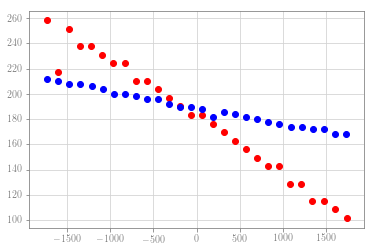

In [17]:
data_100_p1_x = data_100μm['SM100']['Pos1']['y-position'] -2048
data_100_p1_w = data_100μm['SM100']['Pos1']['width']
data_100_p1_w = data_100_p1_w * dispersions['100'] / dispersions['315']

data_315_p1_x = data_100μm['SM315']['Pos1']['y-position'] - 2048
data_315_p1_w = data_100μm['SM315']['Pos1']['width']

plt.scatter(data_100_p1_x, data_100_p1_w, c='r', edgecolor='r')
plt.scatter(data_315_p1_x, data_315_p1_w, c='b', edgecolor='b')
plt.show()

Erst durch die Skalierung beider Achsen ergibt sich eine Übereinstimmung.
Bei SM315 handelt es sich somit um einen Ausschnitt des Spektrums, das bei SM100 abgebildet wird.

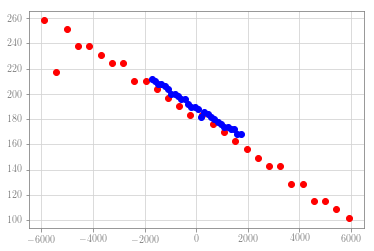

In [18]:
data_100_p1_x = data_100μm['SM100']['Pos1']['y-position']
data_100_p1_x = data_100_p1_x - 2048
data_100_p1_x = data_100_p1_x * dispersions['100'] / dispersions['315']
data_100_p1_w = data_100μm['SM100']['Pos1']['width']
data_100_p1_w = data_100_p1_w * dispersions['100'] / dispersions['315']

data_315_p1_x = data_100μm['SM315']['Pos1']['y-position'] - 2048
data_315_p1_w = data_100μm['SM315']['Pos1']['width']

plt.scatter(data_100_p1_x, data_100_p1_w, c='r', edgecolor='r')
plt.scatter(data_315_p1_x, data_315_p1_w, c='b', edgecolor='b')
plt.show()

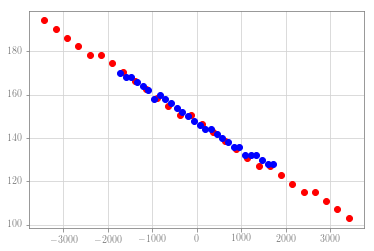

In [19]:
data_125_p1_x = data_100µm['SM125']['Pos1']['y-position']
data_125_p1_x = data_125_p1_x - 2048
data_125_p1_x = data_125_p1_x * dispersions['125'] / dispersions['250']
data_125_p1_w = data_100µm['SM125']['Pos1']['width']
data_125_p1_w = data_125_p1_w * dispersions['125'] / dispersions['250']

data_250_p1_x = data_100µm['SM250']['Pos1']['y-position'] - 2048
data_250_p1_w = data_100µm['SM250']['Pos1']['width']

plt.scatter(data_125_p1_x, data_125_p1_w, c='r', edgecolor='r')
plt.scatter(data_250_p1_x, data_250_p1_w, c='b', edgecolor='b')
plt.show()

In [20]:
data_spalt['SM315'].width.max()

1414.0